In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import torch

In [3]:
# Parameters
device = 'cuda' if torch.cuda.is_available() else 'cpu' # using gpu or cpu
print(device)


cpu


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import data
filepath = '/content/drive/MyDrive/Colab Notebooks/Project/'

dataset = pd.read_csv(os.path.join(filepath, 'train.csv'),names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
dataset['Date'] = pd.to_datetime(dataset['Date'])
print(dataset.head(5))

features = pd.read_csv(os.path.join(filepath, 'features.csv'),sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
features['Date'] = pd.to_datetime(features['Date'])
print(features.head(5))

stores = pd.read_csv(os.path.join(filepath, 'stores.csv'), names=['Store','Type','Size'],sep=',', header=0)





   Store  Dept       Date  weeklySales  isHoliday
0      1     1 2010-02-05     24924.50      False
1      1     1 2010-02-12     46039.49       True
2      1     1 2010-02-19     41595.55      False
3      1     1 2010-02-26     19403.54      False
4      1     1 2010-03-05     21827.90      False
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  
0        NaN        NaN  211.096358         8.106  
1        NaN        NaN  211.242170         8.106  
2        NaN        NaN  211.289143         8.106  
3    

In [65]:
# Merge data
train_dataset = dataset.merge(stores, how='left').merge(features, how='left')
print(train_dataset.head(5))

   Store  Dept       Date  weeklySales  isHoliday Type    Size  Temperature  \
0      1     1 2010-02-05     24924.50      False    A  151315        42.31   
1      1     1 2010-02-12     46039.49       True    A  151315        38.51   
2      1     1 2010-02-19     41595.55      False    A  151315        39.93   
3      1     1 2010-02-26     19403.54      False    A  151315        46.63   
4      1     1 2010-03-05     21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2 

In [76]:
# Data Managment

train_dataset['Week'] = train_dataset.Date.dt.week
train_dataset['Month'] = train_dataset.Date.dt.month
train_dataset['Year'] = train_dataset.Date.dt.year

conditions = [
    train_dataset['Size'] < 100000,
    (train_dataset['Size'] >= 100000) & (train_dataset['Size'] < 175000),
    train_dataset['Size'] >= 175000
]
choices = ["Small", "Medium", "Large"]
train_dataset['Size_Group'] = np.select(conditions, choices)

train_dataset['CPI_Group'] = train_dataset['CPI'].apply(lambda x: 'Low' if x < 160 else 'High')
train_dataset['Unemployment_Group'] = train_dataset['Unemployment'].apply(lambda x: 'Low' if x < 5 else 'High')


train_dataset['MarkDown1_Ind'] = train_dataset['MarkDown1'].apply(lambda x: 'N' if pd.isna(x) else 'Y')
train_dataset['MarkDown2_Ind'] = train_dataset['MarkDown2'].apply(lambda x: 'N' if pd.isna(x) else 'Y')
train_dataset['MarkDown3_Ind'] = train_dataset['MarkDown3'].apply(lambda x: 'N' if pd.isna(x) else 'Y')
train_dataset['MarkDown4_Ind'] = train_dataset['MarkDown4'].apply(lambda x: 'N' if pd.isna(x) else 'Y')
train_dataset['MarkDown5_Ind'] = train_dataset['MarkDown5'].apply(lambda x: 'N' if pd.isna(x) else 'Y')

train_dataset['CPI_Round'] = train_dataset['CPI'].round(decimals=0)
train_dataset['Unemployment_Round'] = train_dataset['Unemployment'].round(decimals=0)

train_dataset['ThanksGiving_Ind'] = np.where((train_dataset['Month'] == 11) & (train_dataset['isHoliday'] == 1), 'Y', 'N')
train_dataset['Chistmas_Ind'] = np.where((train_dataset['Month'] == 12) & (train_dataset['isHoliday'] == 1), 'Y', 'N')
train_dataset['LaborDay_Ind'] = np.where((train_dataset['Month'] == 9) & (train_dataset['isHoliday'] == 1), 'Y', 'N')
train_dataset['SuperBowl_Ind'] = np.where((train_dataset['Month'] == 2) & (train_dataset['isHoliday'] == 1), 'Y', 'N')

print(train_dataset.head(5))

pd.DataFrame(train_dataset.dtypes, columns=['Type'])



<ipython-input-76-ca42b073b241>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_dataset['Week'] = train_dataset.Date.dt.week


   Store  Dept       Date  weeklySales  isHoliday Type    Size  Temperature  \
0      1     1 2010-02-05     24924.50      False    A  151315        42.31   
1      1     1 2010-02-12     46039.49       True    A  151315        38.51   
2      1     1 2010-02-19     41595.55      False    A  151315        39.93   
3      1     1 2010-02-26     19403.54      False    A  151315        46.63   
4      1     1 2010-03-05     21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  ...  MarkDown2_Ind  MarkDown3_Ind  MarkDown4_Ind  \
0       2.572        NaN  ...              N              N              N   
1       2.548        NaN  ...              N              N              N   
2       2.514        NaN  ...              N              N              N   
3       2.561        NaN  ...              N              N              N   
4       2.625        NaN  ...              N              N              N   

   MarkDown5_Ind  CPI_Round  Unemployment_Round  ThanksG

,Type
Store,int64
Dept,int64
Date,datetime64[ns]
weeklySales,float64
isHoliday,bool
Type,object
Size,int64
Temperature,float64
Fuel_Price,float64
MarkDown1,float64


In [ ]:
# Descriptive Analysis
train_dataset.Store.unique()
train_dataset.Dept.unique()
train_dataset[['Date','Week','Year']].drop_duplicates()

,Date,Week,Year
0,2010-02-05,5,2010
1,2010-02-12,6,2010
2,2010-02-19,7,2010
3,2010-02-26,8,2010
4,2010-03-05,9,2010
...,...,...,...
138,2012-09-28,39,2012
139,2012-10-05,40,2012
140,2012-10-12,41,2012
141,2012-10-19,42,2012


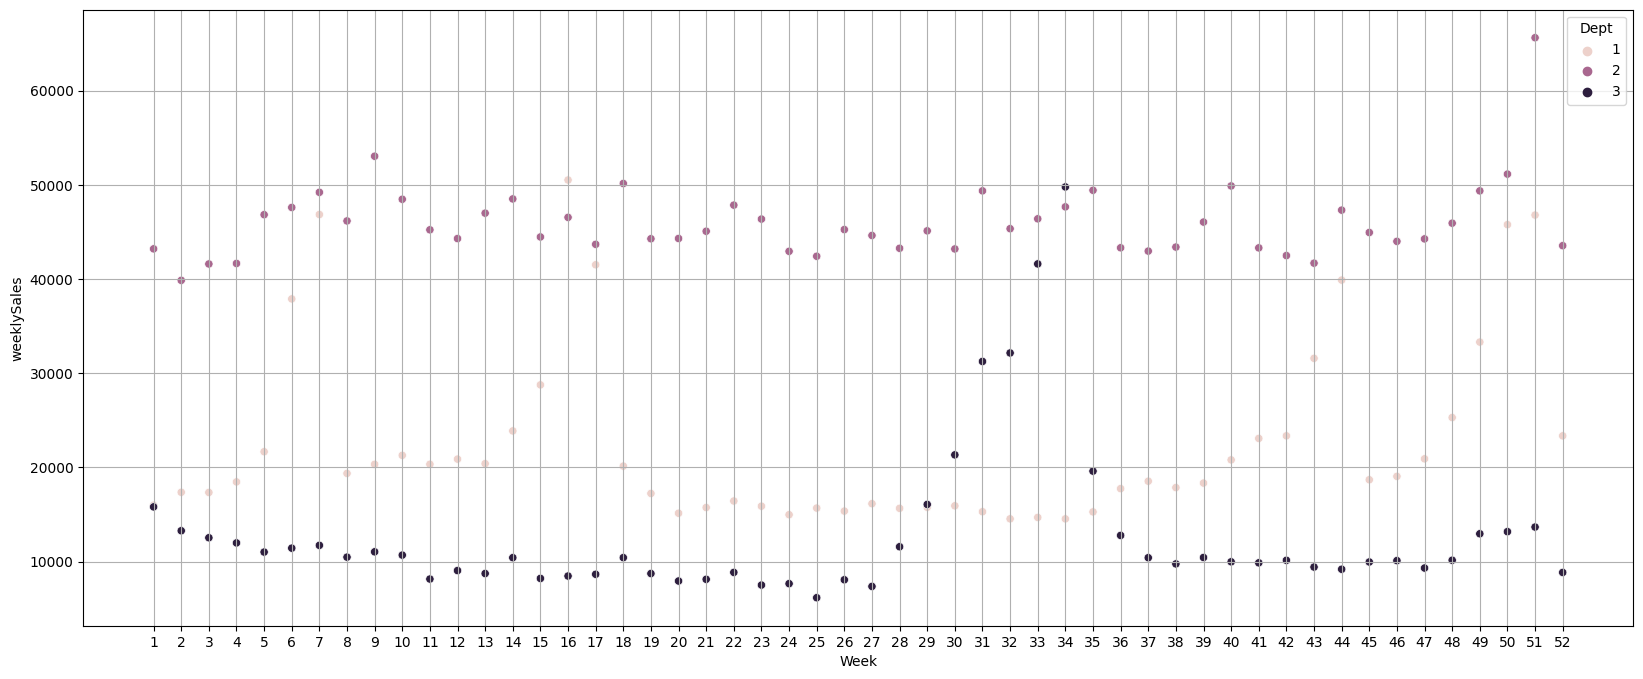

In [ ]:
# Trend by example stores
weekly_sales_2011 = train_dataset[(train_dataset.Year==2011) & (train_dataset.Store==1) & (train_dataset.Dept<=3)]
plt.figure(figsize=(20,8))
sns.scatterplot(data=weekly_sales_2011, x='Week',y='weeklySales', hue='Dept')
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.show()

# Sales pattern depends on store number

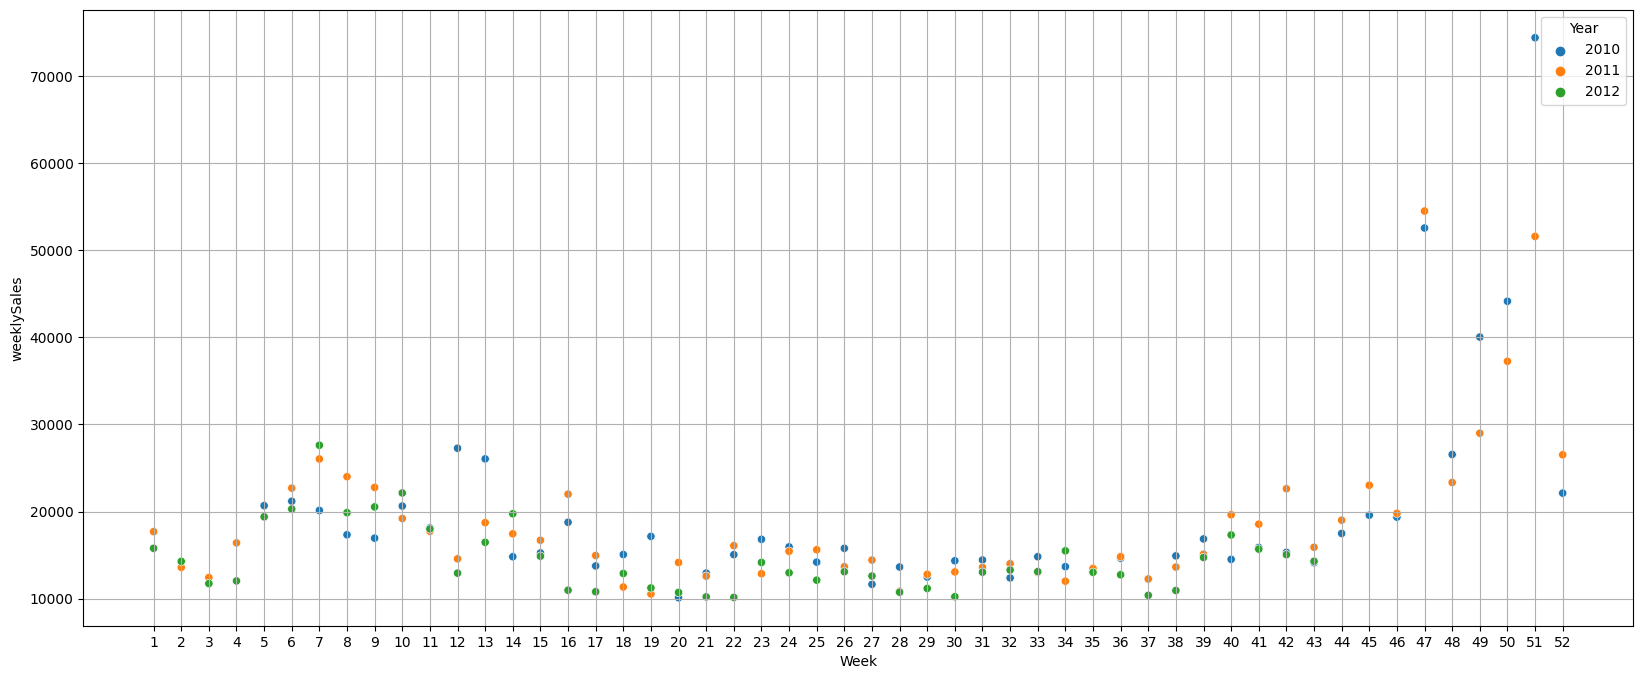

In [ ]:
# Trend by example departments
example_Store = 40
example_Dept = 5

weekly_sales_dept = train_dataset[(train_dataset.Store==example_Store) & (train_dataset.Dept==example_Dept)]
Year_Char = weekly_sales_dept.Year.astype(str)

plt.figure(figsize=(20,8))
sns.scatterplot(data=weekly_sales_dept, x='Week',y='weeklySales', hue=Year_Char)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.show()

# Similar pattern from a same department in a store
# Therefore, use last week's sale and last year's year as new features

219622
34875
Size
34875     5053.415813
37392     6373.033983
39690     8262.936295
39910     8297.715353
41062    13415.114118
Name: weeklySales, dtype: float64


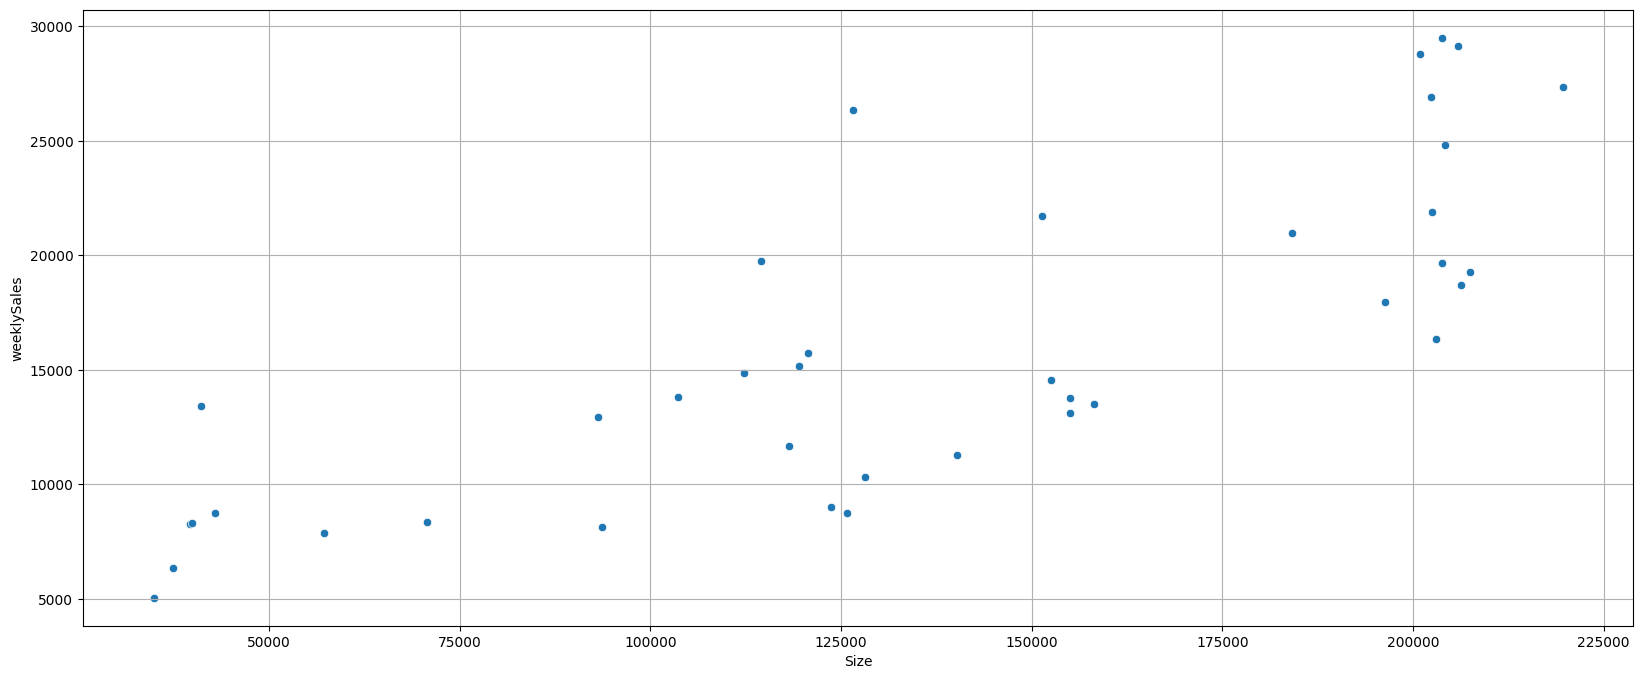

In [ ]:
# Trend by store size
print(train_dataset.Size.max())
print(train_dataset.Size.min())
train_grouped = train_dataset.groupby(['Size'])['weeklySales'].mean()
print(train_grouped.head(5))

plt.figure(figsize=(20,8))
sns.scatterplot(data=train_grouped)
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

# Store size has three rough clusters, <= 100000, > 100000 and <= 175000, > 175000

   Store  Dept       Date  weeklySales  isHoliday Type    Size  Temperature  \
0      1     1 2010-02-05     24924.50      False    A  151315        42.31   
1      1     1 2010-02-12     46039.49       True    A  151315        38.51   
2      1     1 2010-02-19     41595.55      False    A  151315        39.93   
3      1     1 2010-02-26     19403.54      False    A  151315        46.63   
4      1     1 2010-03-05     21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  Week  Year  
0  211.096358         8.106     5  2010  
1  211.2

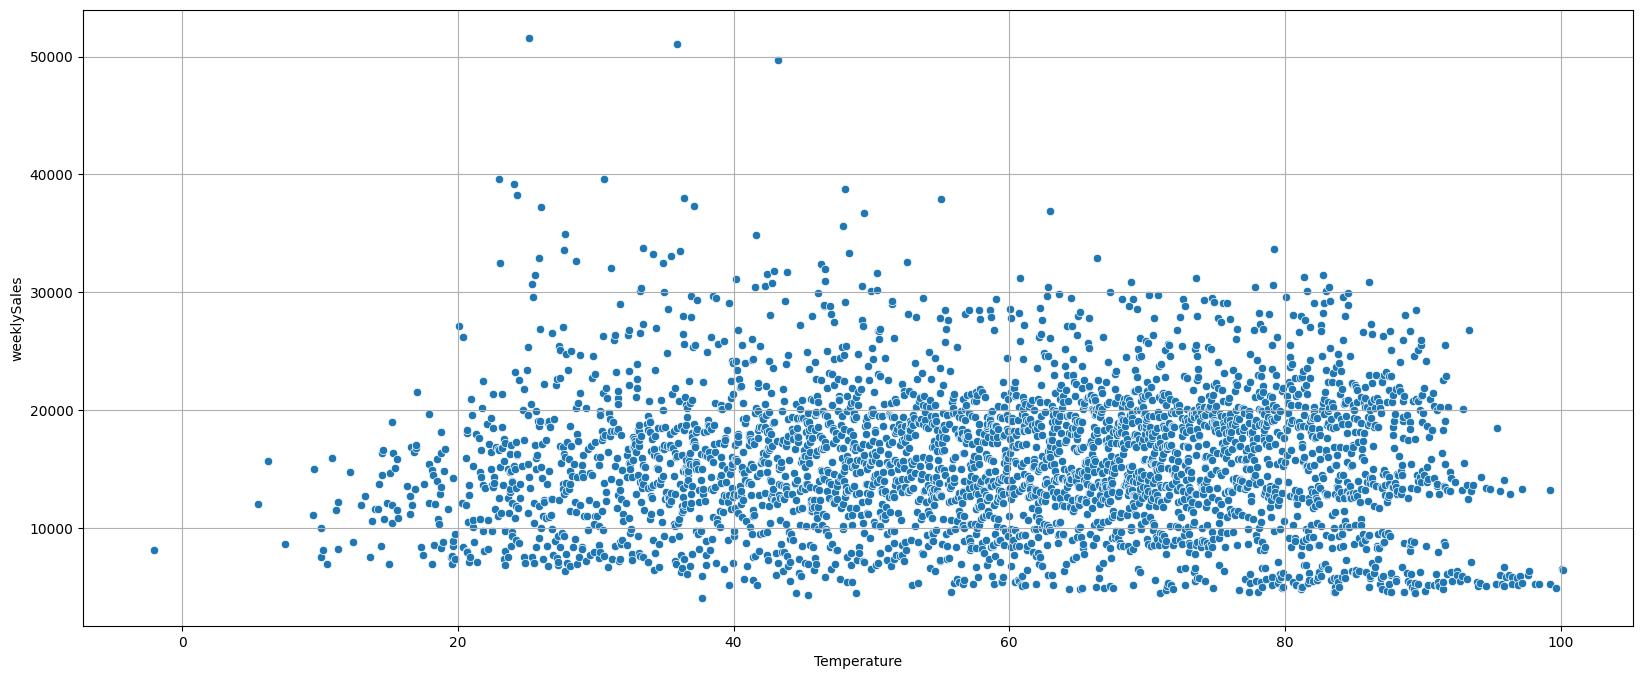

In [ ]:
# Trend by temperature

train_grouped = train_dataset.groupby(['Temperature'])['weeklySales'].mean()
print(train_grouped.head(5))


plt.figure(figsize=(20,8))
sns.scatterplot(data=train_grouped)
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

# It looks like temperature does not matter much

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: weeklySales, dtype: float64


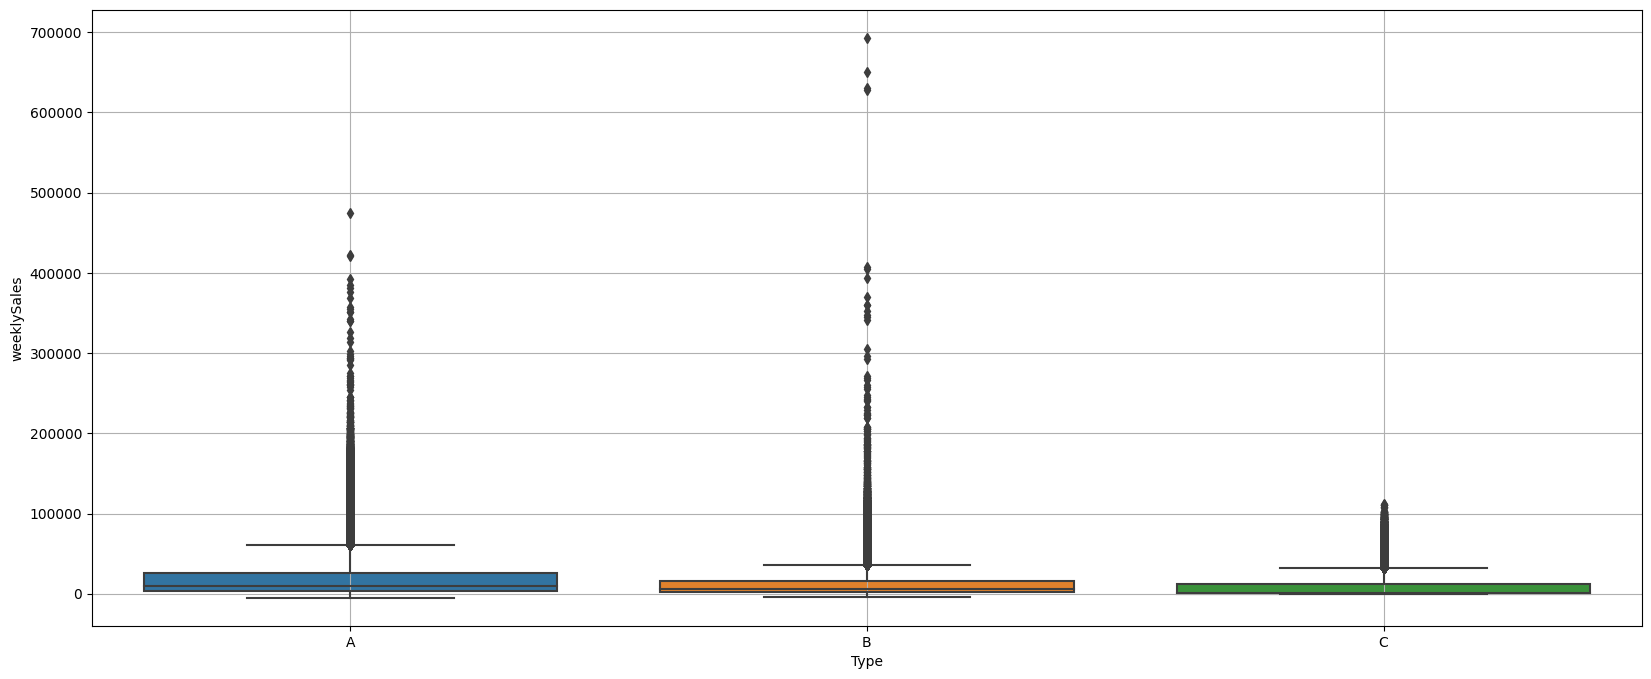

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: weeklySales, dtype: float64


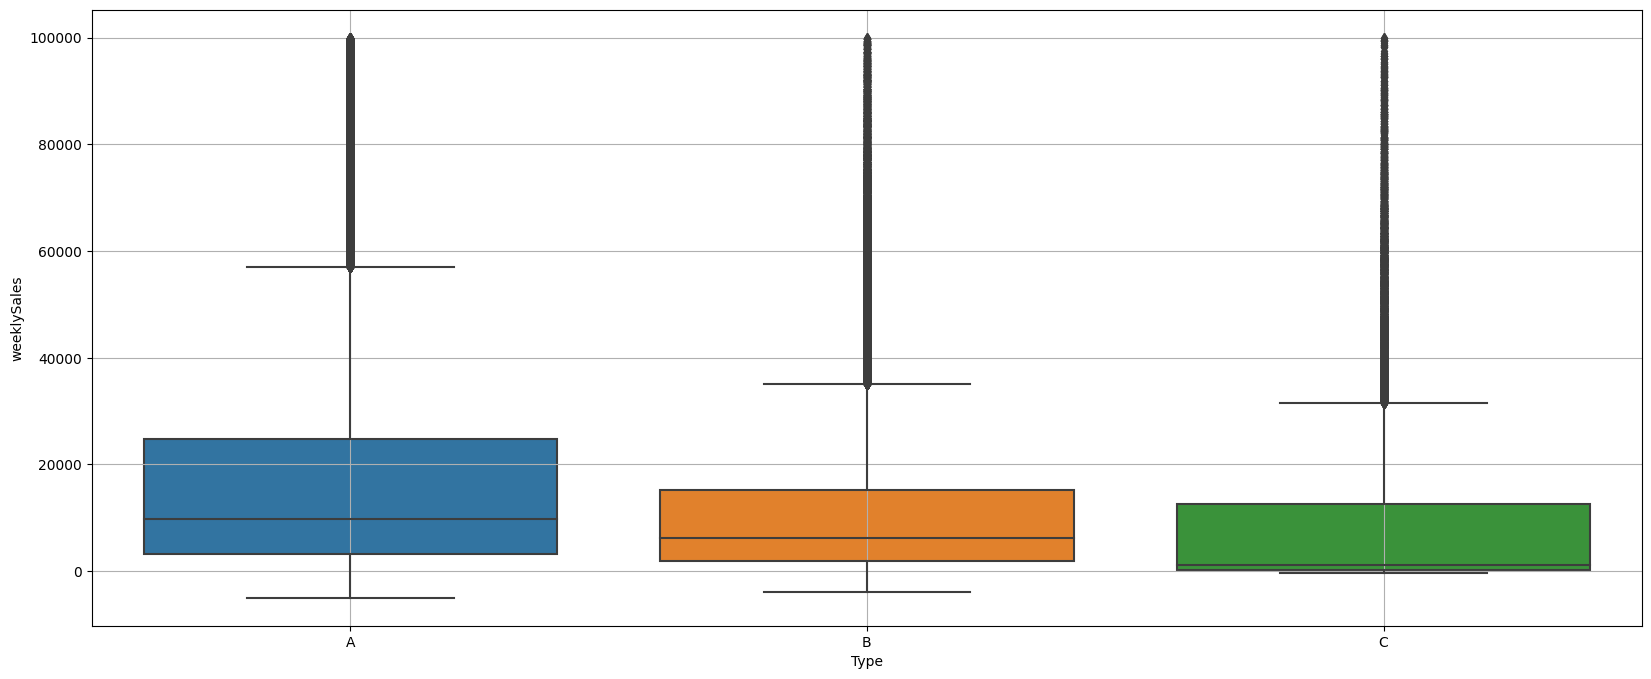

In [ ]:
# Trend by store type

train_grouped = train_dataset.groupby(['Type'])['weeklySales'].mean()
print(train_grouped.head(5))


plt.figure(figsize=(20,8))
sns.boxplot(data=train_dataset, x='Type',y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

###
train_subset = train_dataset[train_dataset['weeklySales']<100000]
print(train_grouped.head(5))


plt.figure(figsize=(20,8))
sns.boxplot(data=train_subset, x='Type',y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


# Some stores' sales are much higher than the others
# Store type matters

Fuel_Price
2.472    12375.816579
2.513     9654.919556
2.514    15685.860695
2.520    11474.857436
2.533    10268.915476
Name: weeklySales, dtype: float64


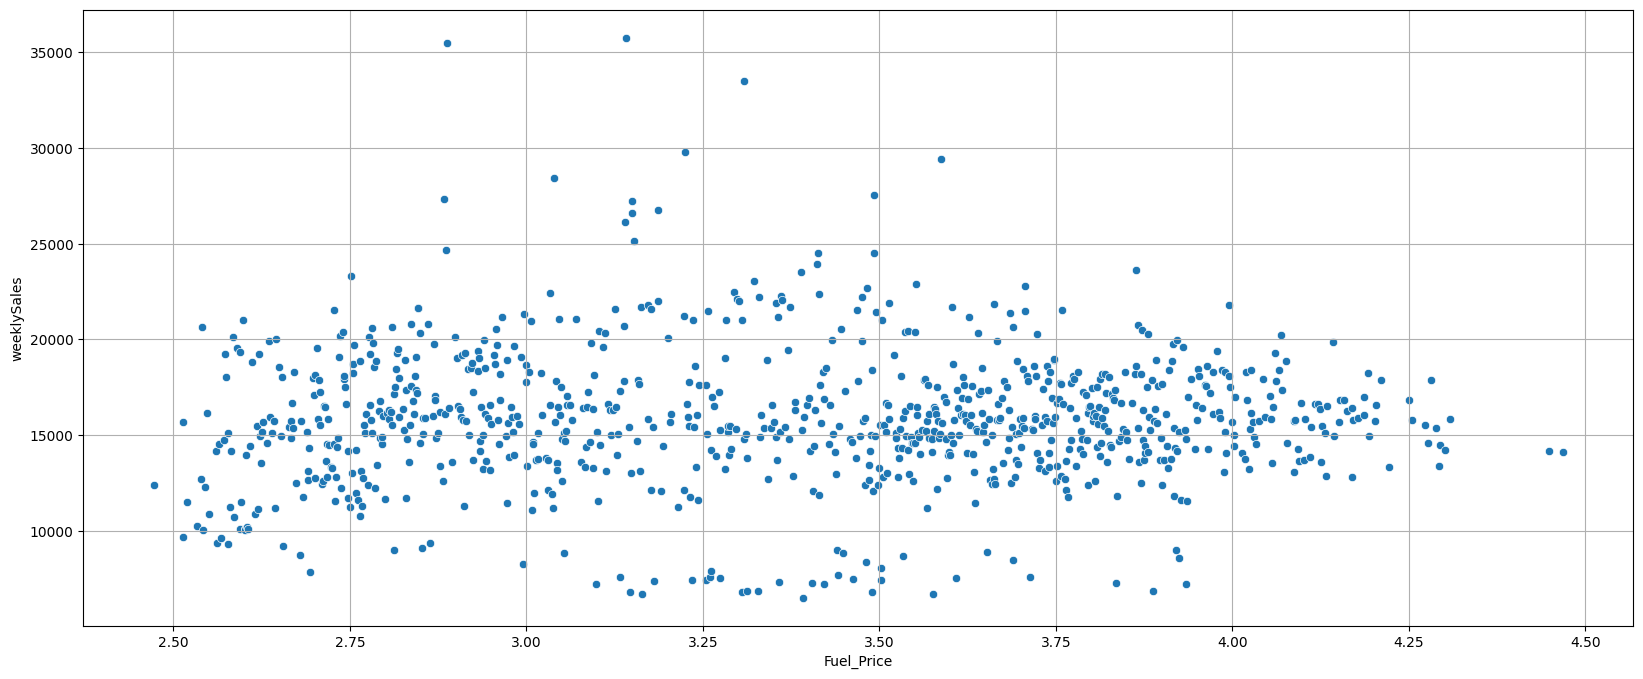

In [ ]:
# Trend by fuel price

train_grouped = train_dataset.groupby(['Fuel_Price'])['weeklySales'].mean()
print(train_grouped.head(5))


plt.figure(figsize=(20,8))
sns.scatterplot(data=train_grouped)
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

# Fuel price does not matter much

MarkDown5_Ind
N    15871.522017
Y    16177.015244
Name: weeklySales, dtype: float64


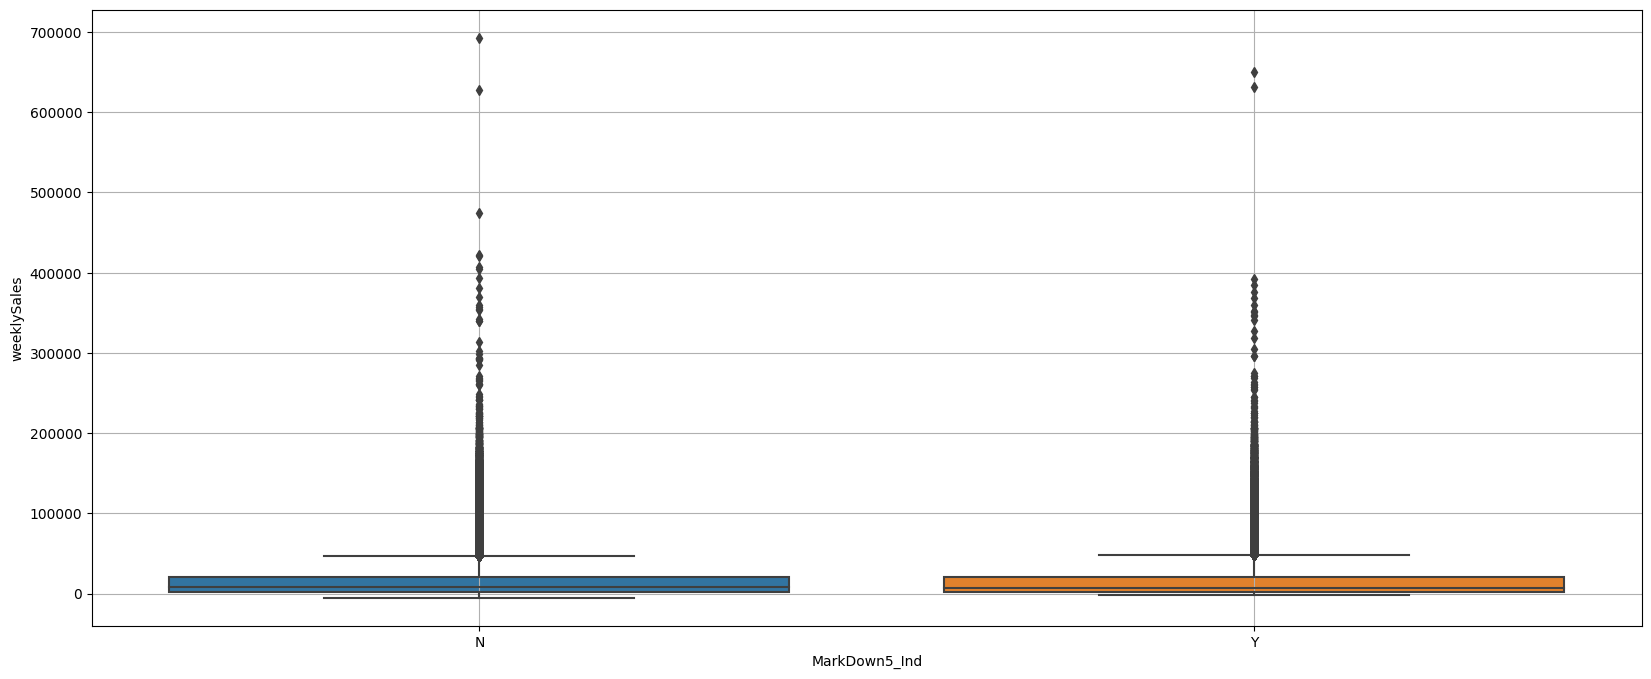

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: weeklySales, dtype: float64


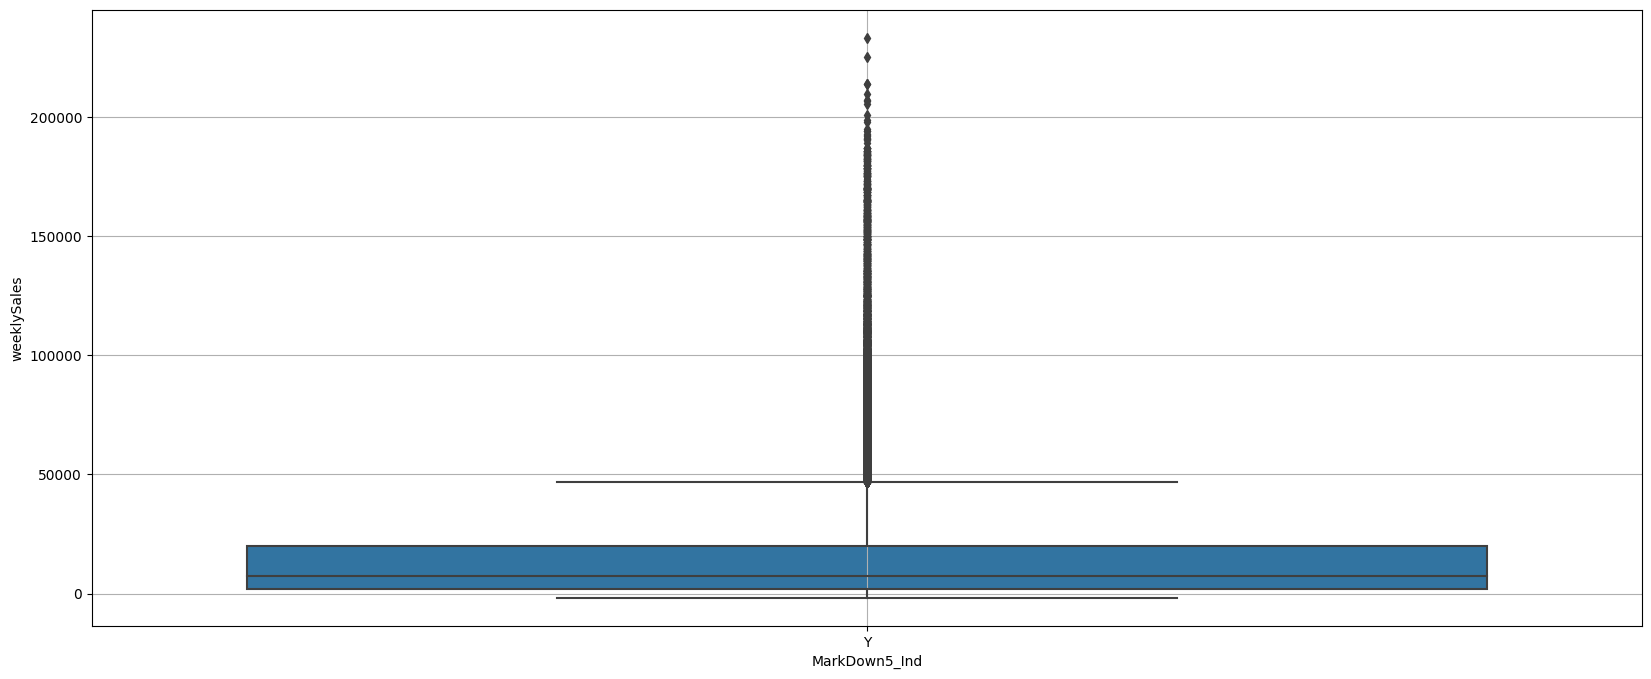

In [ ]:
# Sales by Markdown Indicator

Focus_markdown = 'MarkDown5_Ind'

print(train_dataset.groupby([Focus_markdown])['weeklySales'].mean())


plt.figure(figsize=(20,8))
sns.boxplot(data=train_dataset, x=Focus_markdown,y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

###

train_subset = train_dataset[(train_dataset['weeklySales']<40000) & (train_dataset['Year']>2011)]
#train_subset = train_dataset[(train_dataset['Year']>2011)]
print(train_grouped.head(5))


plt.figure(figsize=(20,8))
sns.boxplot(data=train_subset, x=Focus_markdown,y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


# MarkDown1_Ind to MarkDown4_Ind are useful when we have them, .e.g. after Nov 2011
# MarkDown5_Ind is used every week after 2011

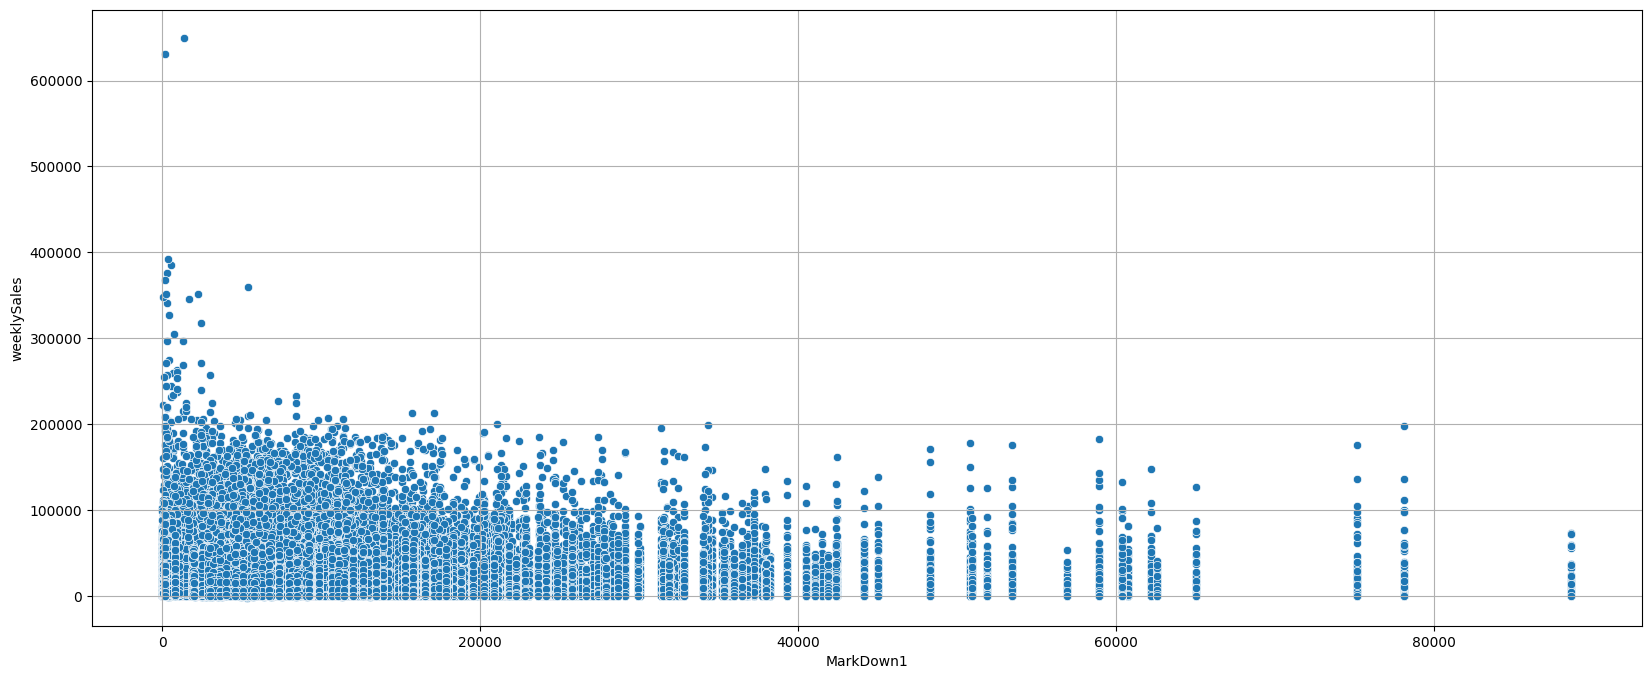

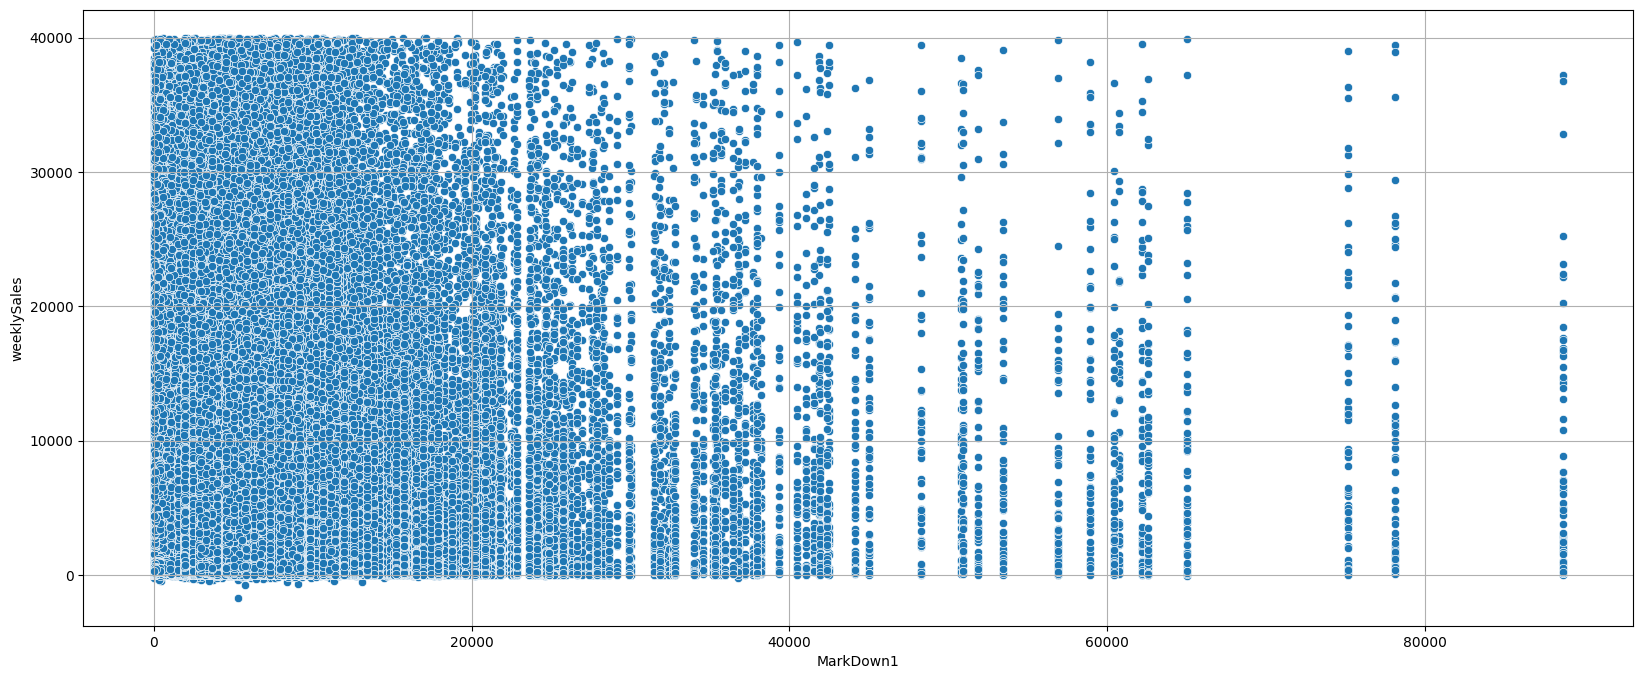

In [ ]:
# Sales by Markdown

Focus_markdown = 'MarkDown1'

plt.figure(figsize=(20,8))
sns.scatterplot(data=train_dataset, x=Focus_markdown,y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

###

train_subset = train_dataset[(train_dataset['weeklySales']<40000) & (train_dataset['Year']>2011)]
plt.figure(figsize=(20,8))
sns.scatterplot(data=train_subset, x=Focus_markdown,y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


# Numeric markdown may not be as useful as the binary ones
# MarkDown1 is more useful around 0
# MarkDown2 is more useful around 0
# It is generally true for all of them

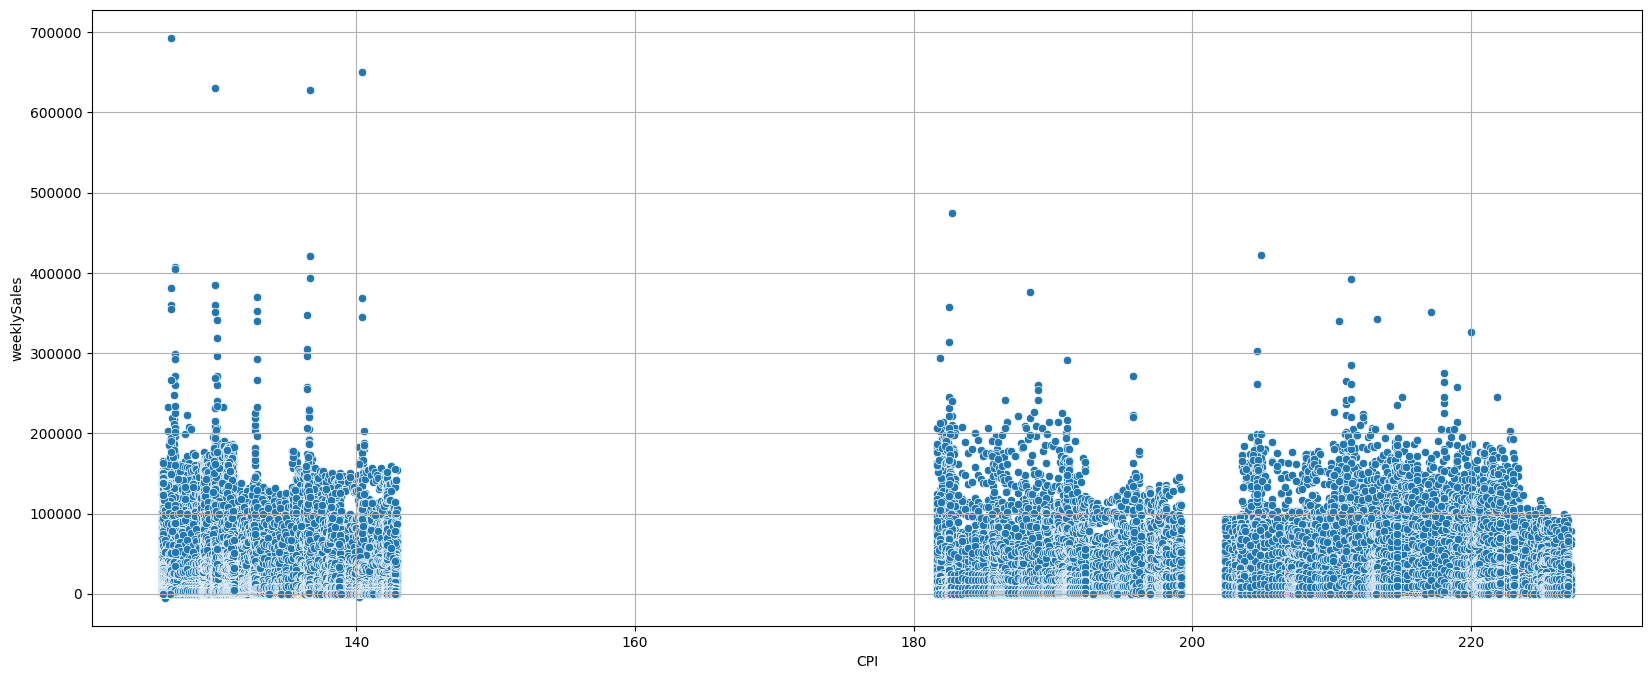

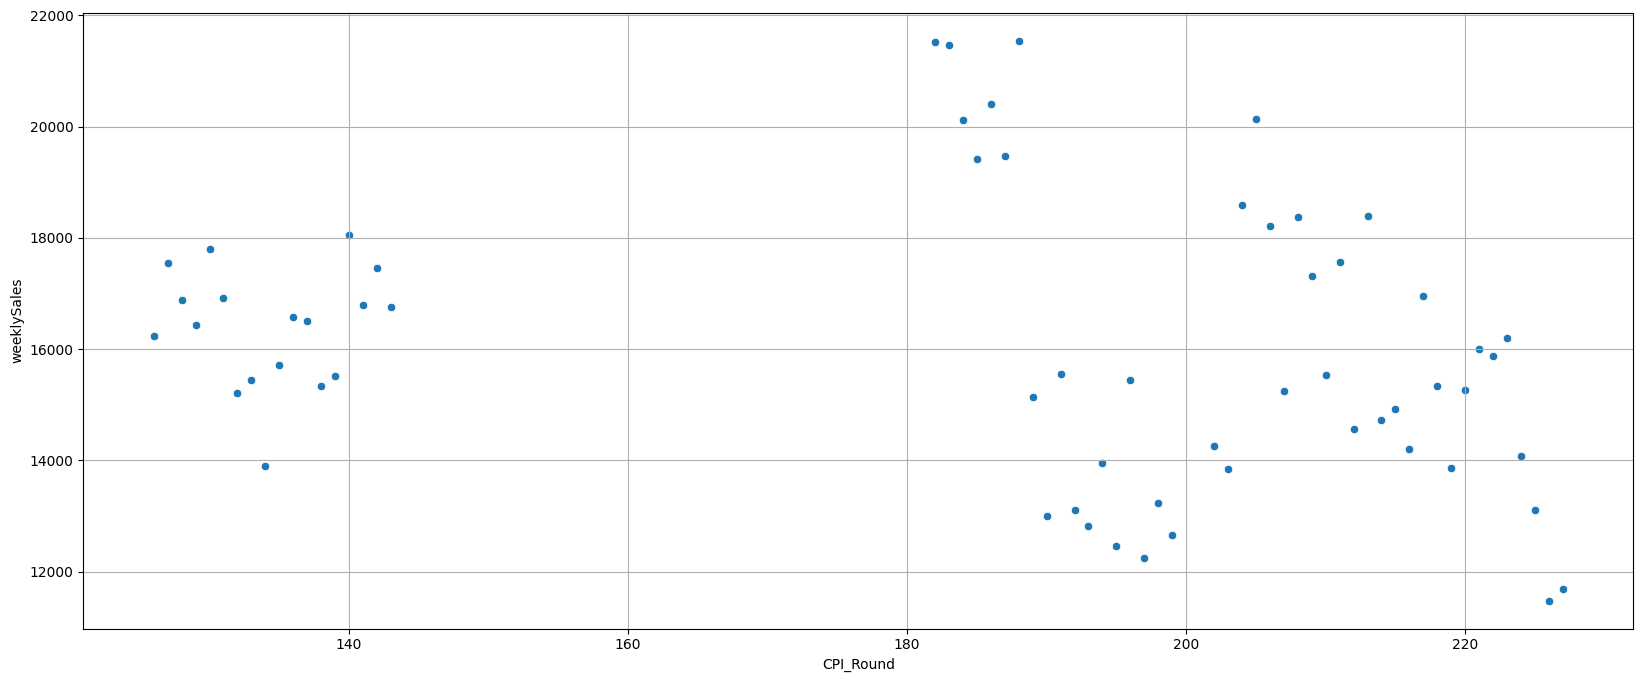

In [ ]:
# Sales by CPI

Focus_Feature = 'CPI'

plt.figure(figsize=(20,8))
sns.scatterplot(data=train_dataset, x=Focus_Feature,y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

###
Focus_Feature = 'CPI_Round'

train_grouped = train_dataset.groupby([Focus_Feature])['weeklySales'].mean()
plt.figure(figsize=(20,8))
sns.scatterplot(data=train_grouped)
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


# CPI < 160 seems to be a different cluster

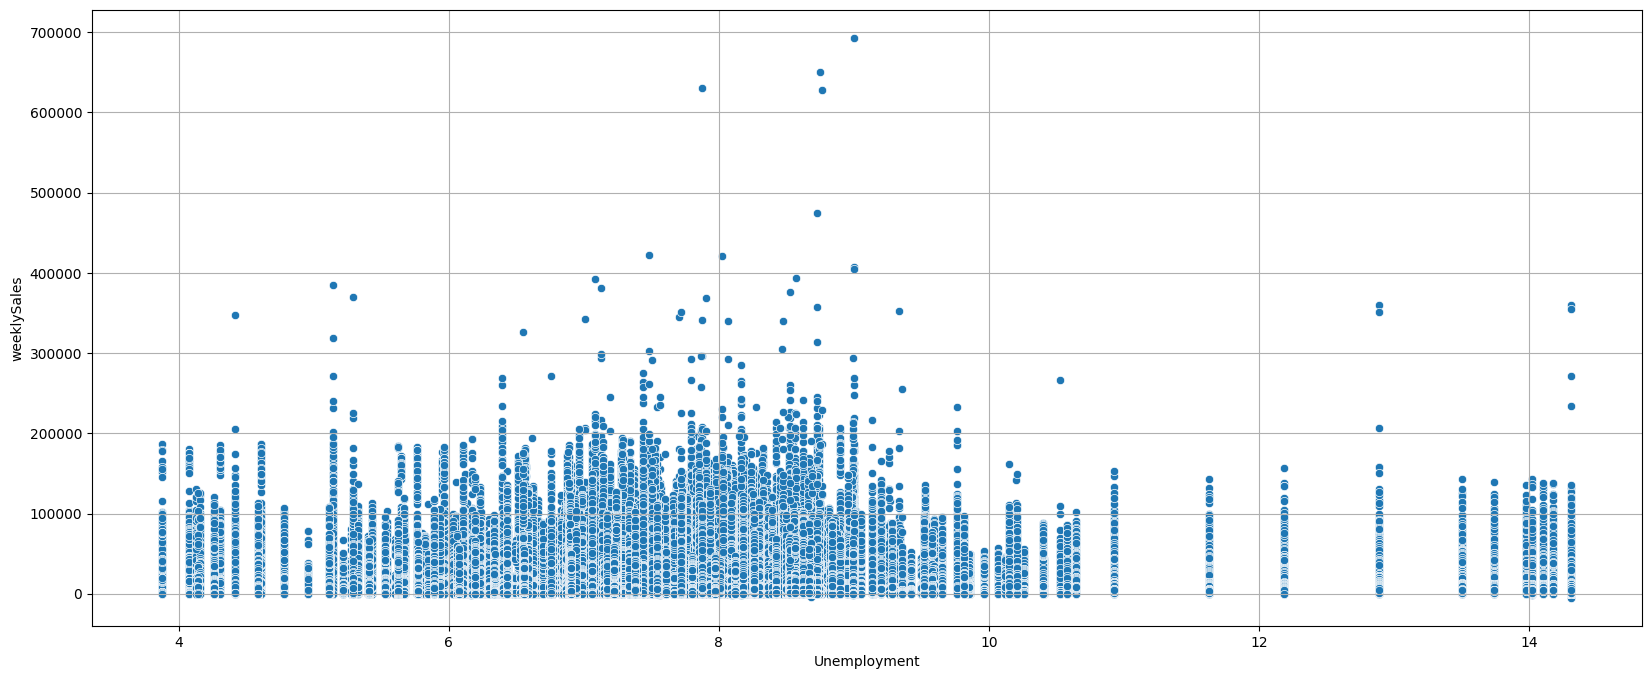

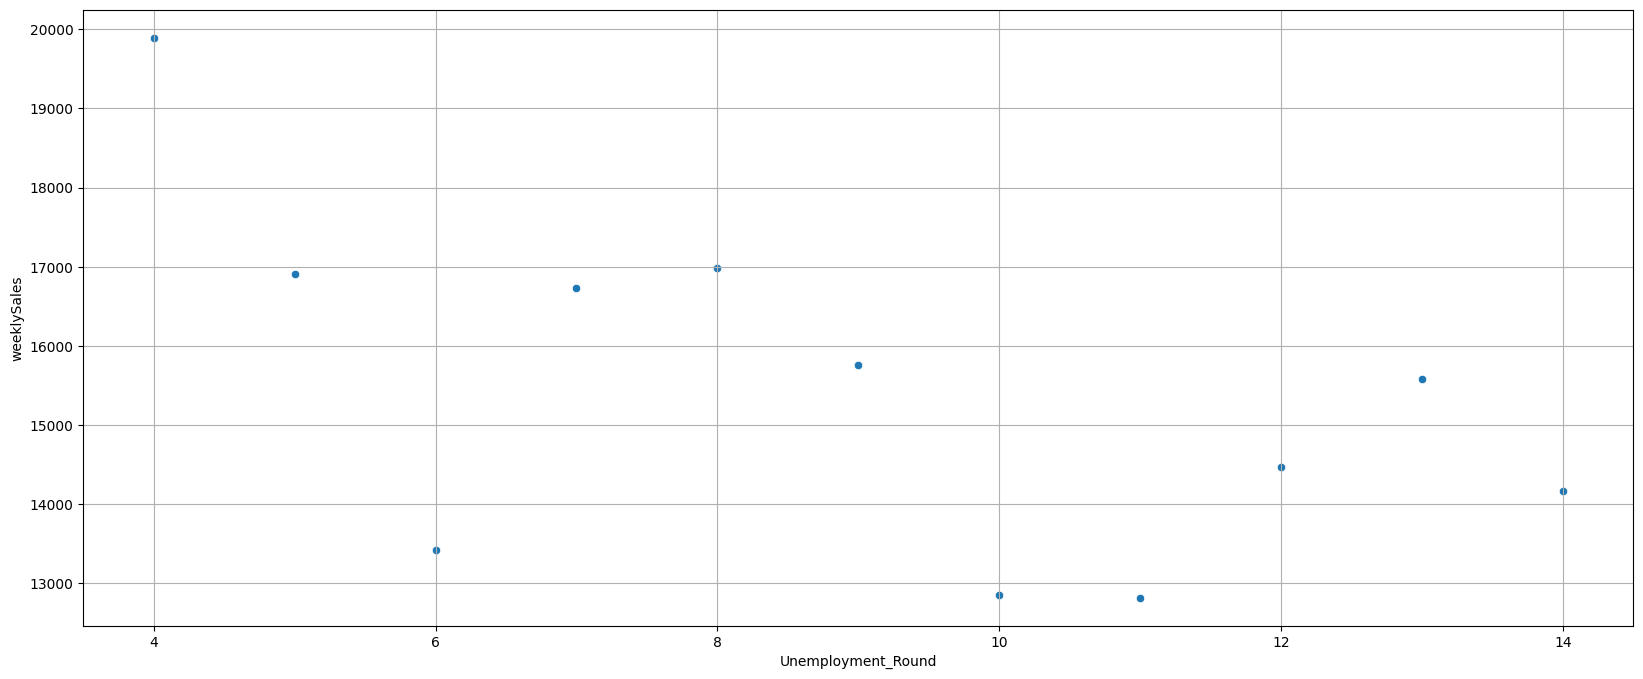

In [ ]:
# Sales by Unemployment

Focus_Feature = 'Unemployment'

plt.figure(figsize=(20,8))
sns.scatterplot(data=train_dataset, x=Focus_Feature,y='weeklySales')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()

###

Focus_Feature = 'Unemployment_Round'

train_grouped = train_dataset.groupby([Focus_Feature])['weeklySales'].mean()
plt.figure(figsize=(20,8))
sns.scatterplot(data=train_grouped)
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


# When Unemployment is high, the average sales are actually better

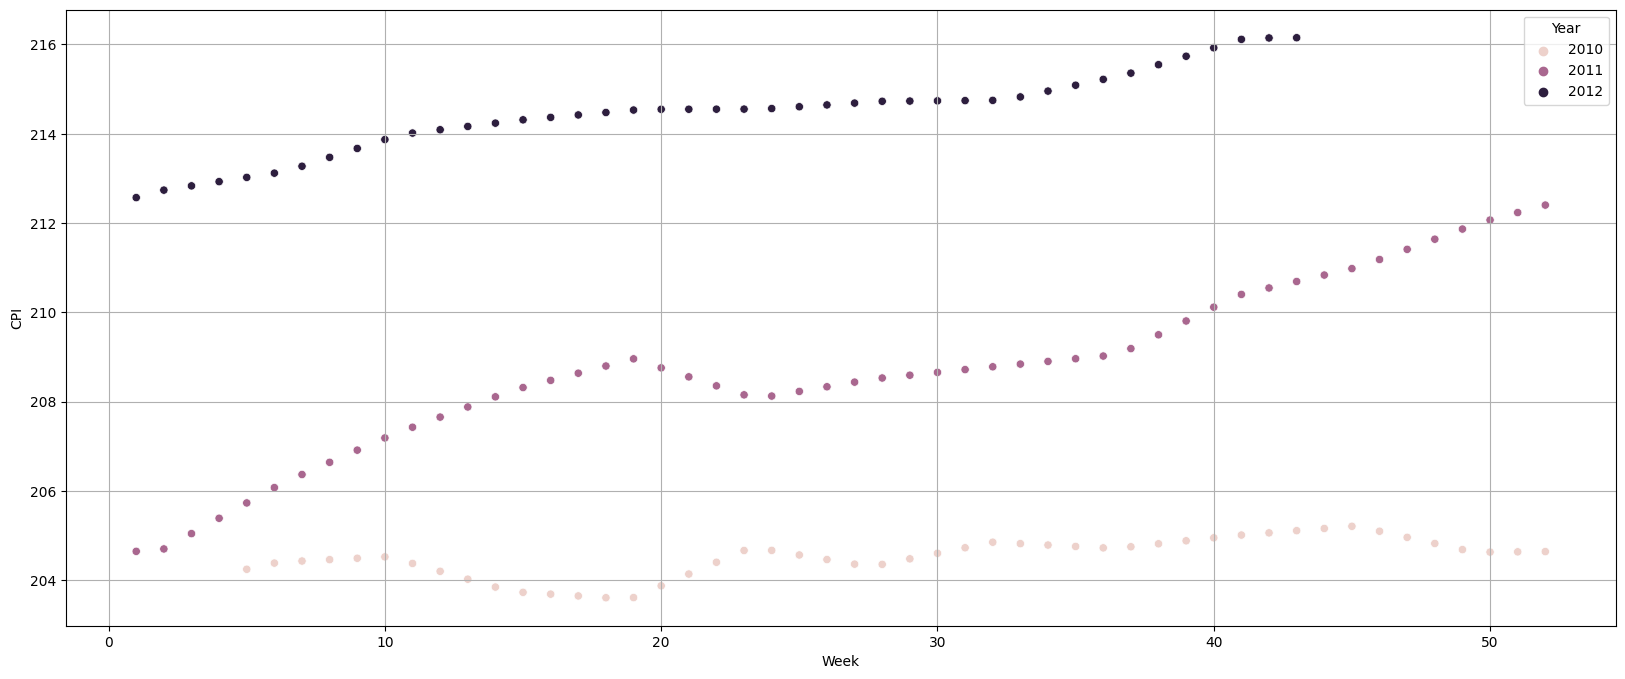

In [74]:
# To address missing values of CPI
Focus_Feature = 'CPI'
#data_plot = pd.DataFrame(train_dataset[ (train_dataset.Store==10) & (train_dataset.Dept==10)])
data_plot = train_dataset[ (train_dataset.Store==20) & (train_dataset.Dept==10) ]
#print(data_plot.dtypes)
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_plot, x='Week', y=Focus_Feature, hue='Year')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


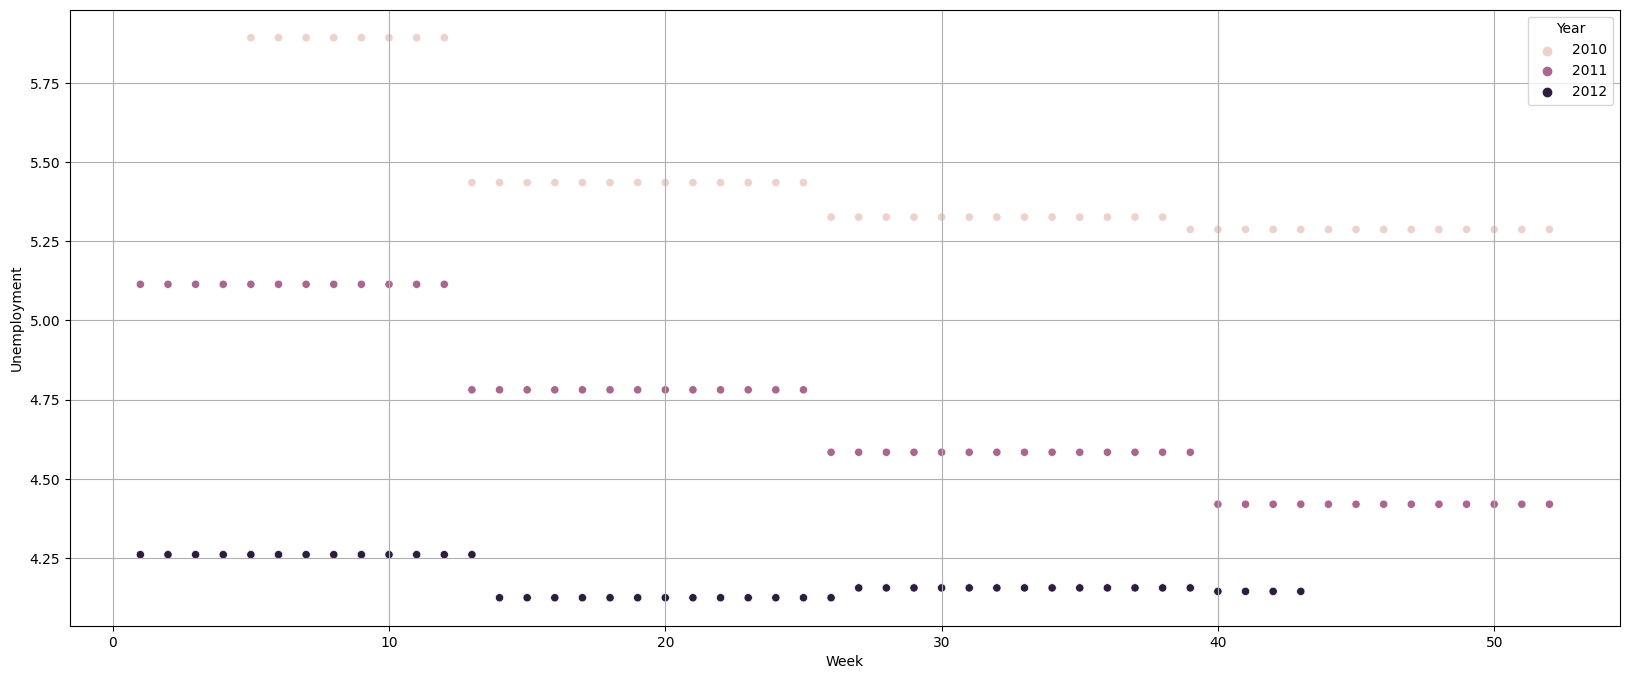

In [72]:
# To address missing values of Unemployment
Focus_Feature = 'Unemployment'
#data_plot = pd.DataFrame(train_dataset[ (train_dataset.Store==10) & (train_dataset.Dept==10)])
data_plot = train_dataset[ (train_dataset.Store==40) & (train_dataset.Dept==10) ]
#print(data_plot.dtypes)
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_plot, x='Week', y=Focus_Feature, hue='Year')
plt.grid()
#plt.xticks(np.arange(34875, 53, step=1))
plt.show()


In [58]:
# Holiday week
train_dataset[train_dataset.isHoliday == 1].groupby(['isHoliday','Week']).size()
#train_dataset[train_dataset.isHoliday == 1]

isHoliday  Week
True       6       8895
           36      8861
           47      5959
           52      5946
dtype: int64

In [ ]:
# Descriptive Analysis
weekly_sales_2010 = train_dataset[train_dataset.Year==2010][['Week','weeklySales']].groupby(['Week']).mean()
weekly_sales_2011 = train_dataset[train_dataset.Year==2011][['Week','weeklySales']].groupby(['Week']).mean()
weekly_sales_2012 = train_dataset[train_dataset.Year==2012][['Week','weeklySales']].groupby(['Week']).mean()
weekly_sales_2013 = train_dataset[train_dataset.Year==2013][['Week','weeklySales']].groupby(['Week']).mean()
#weekly_sales_2010.columns = ['Week', 'weeklySales']
#print(weekly_sales_2010)
print(weekly_sales_2010.dtypes)
print(weekly_sales_2010.shape)

plt.figure(figsize=(20,8))
sns.lineplot(data=weekly_sales_2010, x='Week',y='weeklySales')
sns.lineplot(data=weekly_sales_2011, x='Week',y='weeklySales')
sns.lineplot(data=weekly_sales_2012, x='Week',y='weeklySales')
sns.lineplot(data=weekly_sales_2013, x='Week',y='weeklySales')
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012','2013'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

'''






'''

<Axes: xlabel='Week'>

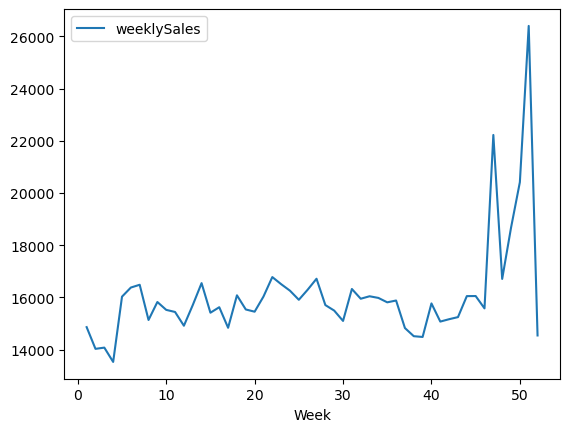

In [ ]:
train_dataset.groupby(['Week'])['weeklySales'].mean().plot(legend=True)